In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Dataset_Final.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   final_tweet  4718 non-null   object
 1   sentiment    4718 non-null   object
dtypes: object(2)
memory usage: 73.8+ KB


In [4]:
df.head()

,final_tweet,sentiment
0,chatib basri kartu prakerja indikator orang pu...,negatif
1,kartu prakerja,netral
2,bbm roket tarif listrik roket garuda rugi krak...,netral
3,untung bukan insentif prakerja,netral
4,tuhan terimakasih rezeki insentif prakerja tah...,positif


In [5]:
text = df.final_tweet
sentiment = df.sentiment

# SPLIT DATA 7:3

## Model NBC

In [6]:
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [7]:
#TFIDF
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=(1,1),
                        norm='l2',
                        sublinear_tf=True)

In [8]:
tf_idf = tfidf.fit_transform(text).toarray()

In [9]:
df_tfidf = pd.DataFrame(tf_idf, 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(text))],
             columns=tfidf.get_feature_names())

In [10]:
df_tfidf.transpose().sample(10)

,sentence 1,sentence 2,sentence 3,sentence 4,sentence 5,sentence 6,sentence 7,sentence 8,sentence 9,sentence 10,...,sentence 4709,sentence 4710,sentence 4711,sentence 4712,sentence 4713,sentence 4714,sentence 4715,sentence 4716,sentence 4717,sentence 4718
aji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
akibat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
do,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sampek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gajilu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
benderang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
university,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pelaksan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zizek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
nbc = MultinomialNB()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(tf_idf,
                                                    sentiment, 
                                                    test_size = 0.3,
                                                    random_state = 123)

In [13]:
nbc.fit(X_train,Y_train)
predict_nbc = nbc.predict(X_test)

In [14]:
training_accuracy = accuracy_score(Y_train, nbc.predict(X_train))
print('Training Acc : ',training_accuracy)

Training Acc :  0.8419139915202908


In [15]:
test_accuracy = accuracy_score(Y_test, predict_nbc)
print('Test Acc : ',test_accuracy)

Test Acc :  0.7620056497175142


In [16]:
print(classification_report(Y_test, predict_nbc))

              precision    recall  f1-score   support

     negatif       0.88      0.66      0.75       300
      netral       0.77      0.65      0.71       489
     positif       0.72      0.90      0.80       627

    accuracy                           0.76      1416
   macro avg       0.79      0.74      0.75      1416
weighted avg       0.77      0.76      0.76      1416



In [17]:
from collections import Counter
print('Prediksi Test :', Counter(predict_nbc))
print('True Value : ',Counter(Y_test))

Prediksi Test : Counter({'positif': 780, 'netral': 411, 'negatif': 225})
True Value :  Counter({'positif': 627, 'netral': 489, 'negatif': 300})


In [18]:
conf_matrix = confusion_matrix(Y_test, predict_nbc)
print(conf_matrix)

[[197  36  67]
 [ 22 318 149]
 [  6  57 564]]


<AxesSubplot:>

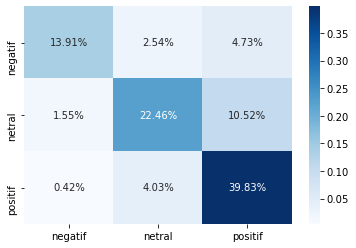

In [19]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

## CNN

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
def convert_predict_cnn(predict):
    x = []
    for i in predict :
        if i == 0 :
            x.append('negatif')
        elif i == 1 :
            x.append('netral')
        else :
            x.append('positif')
    return x

def preprocessing_cnn(X_train,X_test,Test=False):
    tokenizer = Tokenizer(num_words=5000, oov_token='-')   
    tokenizer.fit_on_texts(X_test)
    tokenizer.fit_on_texts(X_train)
    
    sekuens_test = tokenizer.texts_to_sequences(X_test)
    padded_test = pad_sequences(sekuens_test)
    
    if Test == False :
        sekuens_train = tokenizer.texts_to_sequences(X_train)
        padded_train = pad_sequences(sekuens_train) 
        return padded_train, padded_test
        
    else :
        return padded_test

In [22]:
target = pd.get_dummies(df['sentiment'])

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(text,
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state = 123)

In [24]:
padded_train, padded_test = preprocessing_cnn(X_train,X_test)
print('Train : ',len(padded_train))
print('Test : ',len(padded_test))

Train :  3302
Test :  1416


In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=6,monitor='val_loss')

### Model 1 (CNN - Bidirectional LSTM)

In [26]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         262272    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 1,585,667
Trainable params: 1,585,667
Non-trainable params: 0
______________________________________________

In [27]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
# fit
history = model_1.fit(padded_train, Y_train, epochs=20, verbose=2,callbacks=[early_stop], validation_data=(padded_test, Y_test))

Train on 3302 samples, validate on 1416 samples
Epoch 1/20
3302/3302 - 28s - loss: 0.8332 - accuracy: 0.6187 - val_loss: 0.5558 - val_accuracy: 0.7641
Epoch 2/20
3302/3302 - 18s - loss: 0.4912 - accuracy: 0.8183 - val_loss: 0.5049 - val_accuracy: 0.7853
Epoch 3/20
3302/3302 - 19s - loss: 0.3115 - accuracy: 0.9055 - val_loss: 0.5964 - val_accuracy: 0.7867
Epoch 4/20
3302/3302 - 17s - loss: 0.2244 - accuracy: 0.9297 - val_loss: 0.6759 - val_accuracy: 0.7881
Epoch 5/20
3302/3302 - 17s - loss: 0.1727 - accuracy: 0.9461 - val_loss: 0.7556 - val_accuracy: 0.7853
Epoch 6/20
3302/3302 - 17s - loss: 0.1481 - accuracy: 0.9567 - val_loss: 0.8590 - val_accuracy: 0.7811
Epoch 7/20
3302/3302 - 17s - loss: 0.1150 - accuracy: 0.9685 - val_loss: 0.9197 - val_accuracy: 0.7888
Epoch 8/20
3302/3302 - 22s - loss: 0.1025 - accuracy: 0.9682 - val_loss: 1.0380 - val_accuracy: 0.7761


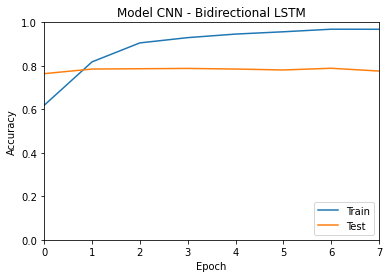

In [28]:
epoch = len(history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis([0,epoch-1,0,1])
plt.title('Model CNN - Bidirectional LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [29]:
predict = model_1.predict(padded_test)
predict_train = model_1.predict(padded_train)

In [30]:
y_test = convert_predict_cnn(np.argmax(np.array(Y_test), axis=1))
y_train = convert_predict_cnn(np.argmax(np.array(Y_train), axis=1))
predict = convert_predict_cnn(np.argmax(predict, axis=1))
predict_train = convert_predict_cnn(np.argmax(predict_train, axis=1))

In [31]:
train_accuracy = accuracy_score(y_train, predict_train)
print("Akurasi Train = ",train_accuracy)

test_accuracy = accuracy_score(y_test, predict)
print("Akurasi Test = ",test_accuracy)

Akurasi Train =  0.9760751059963658
Akurasi Test =  0.7761299435028248


In [32]:
print('Prediksi Test :', Counter(predict))
print('True Value : ',Counter(y_test))

Prediksi Test : Counter({'positif': 644, 'netral': 517, 'negatif': 255})
True Value :  Counter({'positif': 627, 'netral': 489, 'negatif': 300})


In [33]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

     negatif       0.83      0.71      0.76       300
      netral       0.71      0.75      0.73       489
     positif       0.80      0.83      0.82       627

    accuracy                           0.78      1416
   macro avg       0.78      0.76      0.77      1416
weighted avg       0.78      0.78      0.78      1416



In [34]:
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[212  52  36]
 [ 30 369  90]
 [ 13  96 518]]


<AxesSubplot:>

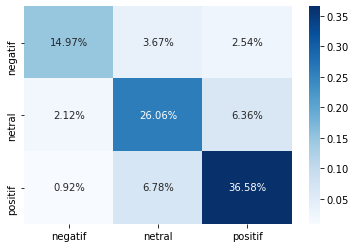

In [35]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

### Model 2 (CNN GlobalMaxPool)

In [36]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,546,499
Trainable params: 1,546,499
Non-trainable params: 0
____________________________________________

In [37]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
# fit
history = model_2.fit(padded_train, Y_train, epochs=20, verbose=2,callbacks=[early_stop], validation_data=(padded_test, Y_test))

Train on 3302 samples, validate on 1416 samples
Epoch 1/20
3302/3302 - 18s - loss: 0.7672 - accuracy: 0.6408 - val_loss: 0.5506 - val_accuracy: 0.7606
Epoch 2/20
3302/3302 - 15s - loss: 0.4722 - accuracy: 0.8147 - val_loss: 0.4834 - val_accuracy: 0.7853
Epoch 3/20
3302/3302 - 15s - loss: 0.2991 - accuracy: 0.8998 - val_loss: 0.5161 - val_accuracy: 0.7775
Epoch 4/20
3302/3302 - 15s - loss: 0.2165 - accuracy: 0.9319 - val_loss: 0.5500 - val_accuracy: 0.7874
Epoch 5/20
3302/3302 - 15s - loss: 0.1783 - accuracy: 0.9518 - val_loss: 0.5975 - val_accuracy: 0.7874
Epoch 6/20
3302/3302 - 15s - loss: 0.1469 - accuracy: 0.9612 - val_loss: 0.6265 - val_accuracy: 0.7903
Epoch 7/20
3302/3302 - 15s - loss: 0.1219 - accuracy: 0.9655 - val_loss: 0.7068 - val_accuracy: 0.7888
Epoch 8/20
3302/3302 - 15s - loss: 0.1104 - accuracy: 0.9700 - val_loss: 0.7547 - val_accuracy: 0.7853


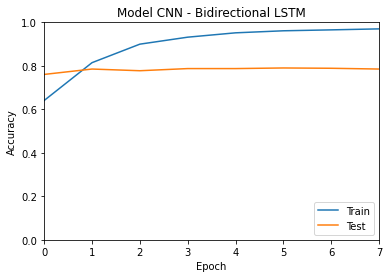

In [38]:
epoch = len(history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis([0,epoch-1,0,1])
plt.title('Model CNN - Bidirectional LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [39]:
predict = model_2.predict(padded_test)
predict_train = model_2.predict(padded_train)

In [40]:
y_test = convert_predict_cnn(np.argmax(np.array(Y_test), axis=1))
y_train = convert_predict_cnn(np.argmax(np.array(Y_train), axis=1))
predict = convert_predict_cnn(np.argmax(predict, axis=1))
predict_train = convert_predict_cnn(np.argmax(predict_train, axis=1))

In [41]:
train_accuracy = accuracy_score(y_train, predict_train)
print("Akurasi Train = ",train_accuracy)

test_accuracy = accuracy_score(y_test, predict)
print("Akurasi Test = ",test_accuracy)

Akurasi Train =  0.9760751059963658
Akurasi Test =  0.7853107344632768


In [42]:
print('Prediksi Test :', Counter(predict))
print('True Value : ',Counter(y_test))

Prediksi Test : Counter({'netral': 572, 'positif': 565, 'negatif': 279})
True Value :  Counter({'positif': 627, 'netral': 489, 'negatif': 300})


In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

     negatif       0.79      0.74      0.76       300
      netral       0.70      0.82      0.76       489
     positif       0.87      0.78      0.82       627

    accuracy                           0.79      1416
   macro avg       0.79      0.78      0.78      1416
weighted avg       0.79      0.79      0.79      1416



In [44]:
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[221  54  25]
 [ 38 401  50]
 [ 20 117 490]]


<AxesSubplot:>

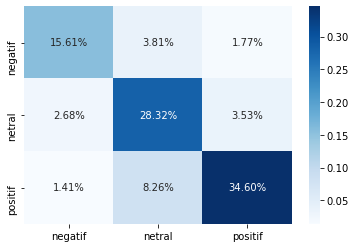

In [45]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

### Model 3 (CNN - LSTM)

In [46]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 1,564,035
Trainable params: 1,564,035
Non-trainable params: 0
____________________________________________

In [47]:
model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
# fit
history = model_3.fit(padded_train, Y_train, epochs=20, verbose=2,callbacks=[early_stop], validation_data=(padded_test, Y_test))

Train on 3302 samples, validate on 1416 samples
Epoch 1/20
3302/3302 - 20s - loss: 0.8378 - accuracy: 0.6108 - val_loss: 0.5821 - val_accuracy: 0.7373
Epoch 2/20
3302/3302 - 16s - loss: 0.5496 - accuracy: 0.7895 - val_loss: 0.5156 - val_accuracy: 0.7705
Epoch 3/20
3302/3302 - 16s - loss: 0.3736 - accuracy: 0.8780 - val_loss: 0.5725 - val_accuracy: 0.7839
Epoch 4/20
3302/3302 - 16s - loss: 0.2578 - accuracy: 0.9204 - val_loss: 0.6653 - val_accuracy: 0.7832
Epoch 5/20
3302/3302 - 16s - loss: 0.1915 - accuracy: 0.9479 - val_loss: 0.7246 - val_accuracy: 0.7733
Epoch 6/20
3302/3302 - 16s - loss: 0.1603 - accuracy: 0.9576 - val_loss: 0.7989 - val_accuracy: 0.7867
Epoch 7/20
3302/3302 - 16s - loss: 0.1280 - accuracy: 0.9631 - val_loss: 0.9365 - val_accuracy: 0.7867
Epoch 8/20
3302/3302 - 16s - loss: 0.1059 - accuracy: 0.9700 - val_loss: 1.0496 - val_accuracy: 0.7768


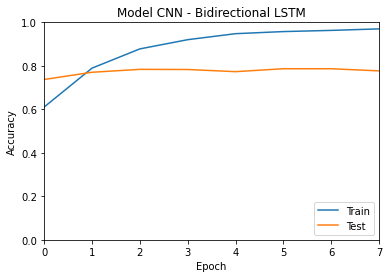

In [48]:
epoch = len(history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis([0,epoch-1,0,1])
plt.title('Model CNN - Bidirectional LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [49]:
predict = model_3.predict(padded_test)
predict_train = model_3.predict(padded_train)

In [50]:
y_test = convert_predict_cnn(np.argmax(np.array(Y_test), axis=1))
y_train = convert_predict_cnn(np.argmax(np.array(Y_train), axis=1))
predict = convert_predict_cnn(np.argmax(predict, axis=1))
predict_train = convert_predict_cnn(np.argmax(predict_train, axis=1))

In [51]:
train_accuracy = accuracy_score(y_train, predict_train)
print("Akurasi Train = ",train_accuracy)

test_accuracy = accuracy_score(y_test, predict)
print("Akurasi Test = ",test_accuracy)

Akurasi Train =  0.9775893397940641
Akurasi Test =  0.7768361581920904


In [52]:
print('Prediksi Test :', Counter(predict))
print('True Value : ',Counter(y_test))

Prediksi Test : Counter({'positif': 622, 'netral': 508, 'negatif': 286})
True Value :  Counter({'positif': 627, 'netral': 489, 'negatif': 300})


In [53]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

     negatif       0.78      0.74      0.76       300
      netral       0.72      0.75      0.74       489
     positif       0.82      0.81      0.82       627

    accuracy                           0.78      1416
   macro avg       0.77      0.77      0.77      1416
weighted avg       0.78      0.78      0.78      1416



In [54]:
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[222  42  36]
 [ 45 368  76]
 [ 19  98 510]]


<AxesSubplot:>

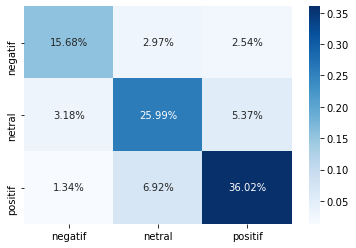

In [55]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

# KFold k=5

In [56]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

## NBC

In [57]:
#NBC
model_nbc = MultinomialNB()
train_scores = []
test_scores = []
predict_value = []
report = []
index = []

for train_index, test_index in skf.split(tf_idf, sentiment):
    index.append([train_index, test_index])
    X_train = tf_idf[train_index]
    X_test = tf_idf[test_index]
    y_train = sentiment[train_index]
    y_test = sentiment[test_index]

    #Train the model
    model_nbc.fit(X_train, y_train)
    
    train_yhat = model_nbc.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    # evaluate on the test dataset
    test_yhat = model_nbc.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    report.append(classification_report(y_test, test_yhat))
    predict_value.append(test_yhat)
    

In [58]:
df_score = pd.DataFrame(data = {'Akurasi Train': train_scores, 
                                'Akurasi Test': test_scores}, 
             index=['K'+str(i) for i in range(1, 1+len(train_scores))])

In [59]:
df_score

,Akurasi Train,Akurasi Test
K1,0.844197,0.770127
K2,0.845522,0.751059
K3,0.843667,0.751059
K4,0.842649,0.777306
K5,0.847682,0.716861


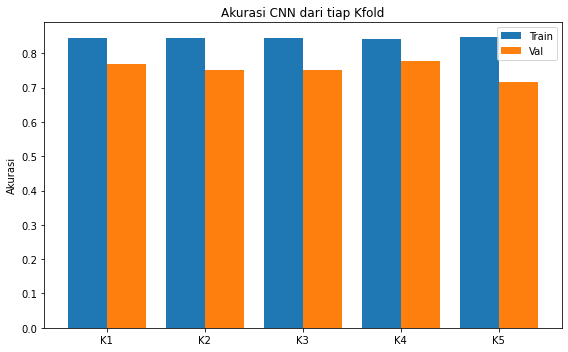

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)  # the label locations
width = 0.4  # the width of the bars
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Akurasi')
ax.set_title('Akurasi CNN dari tiap Kfold')
ax.set_xticks(x)
ax.set_xticklabels(['K1','K2','K3','K4','K5'])
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [61]:
n = test_scores.index(max(test_scores))

y_test = sentiment[index[n][1]]

In [62]:
print('Best Train Acc : ',train_scores[n])
print('Best Test Acc : ',test_scores[n])

Best Train Acc :  0.8426490066225165
Best Test Acc :  0.777306468716861


In [63]:
print(report[n])

              precision    recall  f1-score   support

     negatif       0.85      0.66      0.74       192
      netral       0.81      0.69      0.74       344
     positif       0.74      0.91      0.81       407

    accuracy                           0.78       943
   macro avg       0.80      0.75      0.77       943
weighted avg       0.79      0.78      0.77       943



In [64]:
conf_matrix = confusion_matrix(y_test, predict_value[n])
print(conf_matrix)

[[126  24  42]
 [ 18 237  89]
 [  5  32 370]]


<AxesSubplot:>

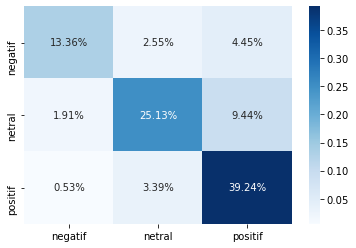

In [65]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

## CNN - Bidirectional LSTM

In [66]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 1,585,667
Trainable params: 1,585,667
Non-trainable params: 0
____________________________________________

In [67]:
train_scores = []
test_scores = []
predict_value = []
report = []
index = []
final_tweet = df['final_tweet'].to_numpy()
sentiment = df['sentiment'].to_numpy()
for train_index, test_index in skf.split(final_tweet, sentiment):
    index.append([train_index, test_index])
    X_train = final_tweet[train_index]
    X_test = final_tweet[test_index]
    y_train = pd.get_dummies(sentiment[train_index])
    y_test = pd.get_dummies(sentiment[test_index])

    padded_train, padded_test = preprocessing_cnn(X_train,X_test)
    
    model_1.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
    # train model
    model_1.fit(padded_train, y_train, epochs=20, verbose=0,callbacks=[early_stop], validation_data=(padded_test, y_test))
    
    #convert label
    y_test = convert_predict_cnn(np.argmax(np.array(y_test), axis=1))
    y_train = convert_predict_cnn(np.argmax(np.array(y_train), axis=1))
    
    train_yhat = convert_predict_cnn(np.argmax(model_1.predict(padded_train),axis=1))
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = convert_predict_cnn(np.argmax(model_1.predict(padded_test),axis=1))
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    report.append(classification_report(y_test, test_yhat))
    predict_value.append(test_yhat)

In [68]:
df_score = pd.DataFrame(data = {'Akurasi Train': train_scores, 
                                'Akurasi Test': test_scores}, 
             index=['K'+str(i) for i in range(1, 1+len(train_scores))])

In [69]:
df_score

,Akurasi Train,Akurasi Test
K1,0.977742,0.775424
K2,0.981187,0.794492
K3,0.979597,0.793432
K4,0.982781,0.814422
K5,0.981722,0.818664


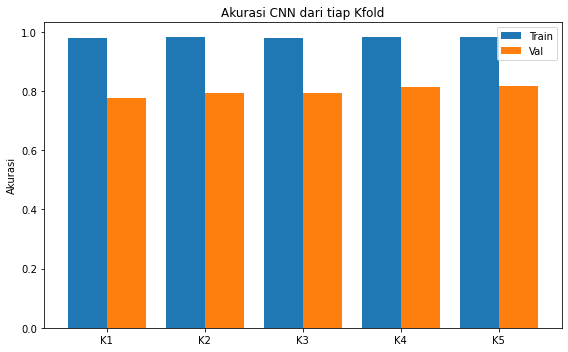

In [70]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)  # the label locations
width = 0.4  # the width of the bars
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Akurasi')
ax.set_title('Akurasi CNN dari tiap Kfold')
ax.set_xticks(x)
ax.set_xticklabels(['K1','K2','K3','K4','K5'])
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [71]:
n = test_scores.index(max(test_scores))

y_test = sentiment[index[n][1]]

In [72]:
print('Best Train Acc : ',train_scores[n])
print('Best Test Acc : ',test_scores[n])

Best Train Acc :  0.9817218543046358
Best Test Acc :  0.8186638388123012


In [73]:
print(report[n])

              precision    recall  f1-score   support

     negatif       0.77      0.77      0.77       191
      netral       0.82      0.78      0.80       345
     positif       0.84      0.87      0.85       407

    accuracy                           0.82       943
   macro avg       0.81      0.81      0.81       943
weighted avg       0.82      0.82      0.82       943



In [74]:
conf_matrix = confusion_matrix(y_test, predict_value[n])
print(conf_matrix)

[[148  18  25]
 [ 32 270  43]
 [ 12  41 354]]


<AxesSubplot:>

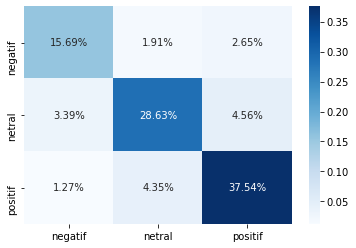

In [75]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

## CNN Global MaxPool

In [76]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
Total params: 1,546,499
Trainable params: 1,546,499
Non-trainable params: 0
____________________________________________

In [77]:
train_scores = []
test_scores = []
predict_value = []
report = []
index = []
final_tweet = df['final_tweet'].to_numpy()
sentiment = df['sentiment'].to_numpy()
for train_index, test_index in skf.split(final_tweet, sentiment):
    index.append([train_index, test_index])
    X_train = final_tweet[train_index]
    X_test = final_tweet[test_index]
    y_train = pd.get_dummies(sentiment[train_index])
    y_test = pd.get_dummies(sentiment[test_index])

    padded_train, padded_test = preprocessing_cnn(X_train,X_test)
    
    model_2.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
    # train model
    model_2.fit(padded_train, y_train, epochs=20, verbose=0,callbacks=[early_stop], validation_data=(padded_test, y_test))
    
    #convert label
    y_test = convert_predict_cnn(np.argmax(np.array(y_test), axis=1))
    y_train = convert_predict_cnn(np.argmax(np.array(y_train), axis=1))
    
    train_yhat = convert_predict_cnn(np.argmax(model_2.predict(padded_train),axis=1))
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = convert_predict_cnn(np.argmax(model_2.predict(padded_test),axis=1))
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    report.append(classification_report(y_test, test_yhat))
    predict_value.append(test_yhat)

In [78]:
df_score = pd.DataFrame(data = {'Akurasi Train': train_scores, 
                                'Akurasi Test': test_scores}, 
             index=['K'+str(i) for i in range(1, 1+len(train_scores))])

In [79]:
df_score

,Akurasi Train,Akurasi Test
K1,0.976683,0.770127
K2,0.980657,0.830508
K3,0.978802,0.817797
K4,0.979338,0.822906
K5,0.979603,0.856840


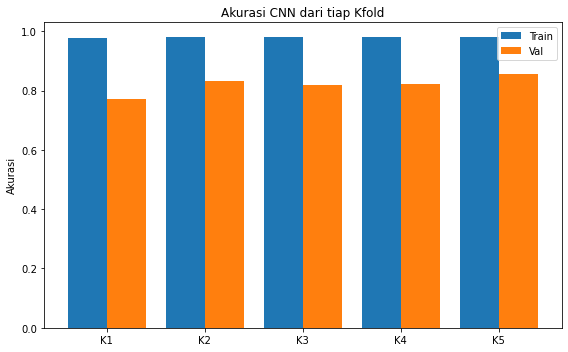

In [80]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)  # the label locations
width = 0.4  # the width of the bars
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Akurasi')
ax.set_title('Akurasi CNN dari tiap Kfold')
ax.set_xticks(x)
ax.set_xticklabels(['K1','K2','K3','K4','K5'])
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [81]:
n = test_scores.index(max(test_scores))

y_test = sentiment[index[n][1]]

In [82]:
print('Best Train Acc : ',train_scores[n])
print('Best Test Acc : ',test_scores[n])

Best Train Acc :  0.9796026490066225
Best Test Acc :  0.8568398727465536


In [83]:
print(report[n])

              precision    recall  f1-score   support

     negatif       0.80      0.81      0.80       191
      netral       0.83      0.86      0.84       345
     positif       0.91      0.88      0.90       407

    accuracy                           0.86       943
   macro avg       0.85      0.85      0.85       943
weighted avg       0.86      0.86      0.86       943



In [84]:
conf_matrix = confusion_matrix(y_test, predict_value[n])
print(conf_matrix)

[[154  24  13]
 [ 27 295  23]
 [ 12  36 359]]


<AxesSubplot:>

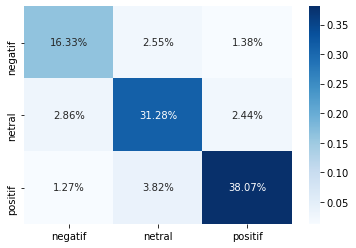

In [85]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

## CNN - LSTM

In [86]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
#     tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(32),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 1,564,035
Trainable params: 1,564,035
Non-trainable params: 0
____________________________________________

In [87]:
train_scores = []
test_scores = []
predict_value = []
report = []
index = []
final_tweet = df['final_tweet'].to_numpy()
sentiment = df['sentiment'].to_numpy()
for train_index, test_index in skf.split(final_tweet, sentiment):
    index.append([train_index, test_index])
    X_train = final_tweet[train_index]
    X_test = final_tweet[test_index]
    y_train = pd.get_dummies(sentiment[train_index])
    y_test = pd.get_dummies(sentiment[test_index])

    padded_train, padded_test = preprocessing_cnn(X_train,X_test)
    
    model_3.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
    # train model
    model_3.fit(padded_train, y_train, epochs=20, verbose=0,callbacks=[early_stop], validation_data=(padded_test, y_test))
    
    #convert label
    y_test = convert_predict_cnn(np.argmax(np.array(y_test), axis=1))
    y_train = convert_predict_cnn(np.argmax(np.array(y_train), axis=1))
    
    train_yhat = convert_predict_cnn(np.argmax(model_3.predict(padded_train),axis=1))
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = convert_predict_cnn(np.argmax(model_3.predict(padded_test),axis=1))
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    report.append(classification_report(y_test, test_yhat))
    predict_value.append(test_yhat)

In [88]:
df_score = pd.DataFrame(data = {'Akurasi Train': train_scores, 
                                'Akurasi Test': test_scores}, 
             index=['K'+str(i) for i in range(1, 1+len(train_scores))])

In [89]:
df_score

,Akurasi Train,Akurasi Test
K1,0.980922,0.772246
K2,0.981187,0.794492
K3,0.979332,0.802966
K4,0.983046,0.814422
K5,0.981457,0.812301


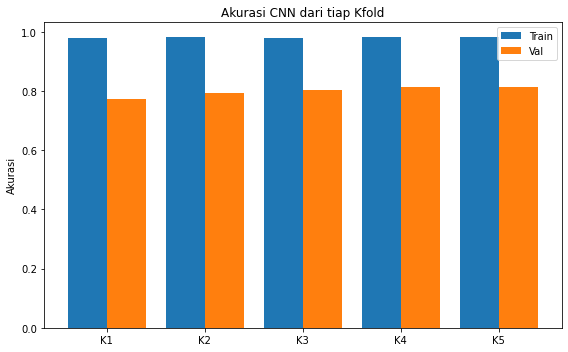

In [90]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)  # the label locations
width = 0.4  # the width of the bars
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Akurasi')
ax.set_title('Akurasi CNN dari tiap Kfold')
ax.set_xticks(x)
ax.set_xticklabels(['K1','K2','K3','K4','K5'])
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [91]:
n = test_scores.index(max(test_scores))

y_test = sentiment[index[n][1]]

In [92]:
print('Best Train Acc : ',train_scores[n])
print('Best Test Acc : ',test_scores[n])

Best Train Acc :  0.983046357615894
Best Test Acc :  0.8144220572640509


In [93]:
print(report[n])

              precision    recall  f1-score   support

     negatif       0.78      0.79      0.78       192
      netral       0.79      0.80      0.79       344
     positif       0.86      0.84      0.85       407

    accuracy                           0.81       943
   macro avg       0.81      0.81      0.81       943
weighted avg       0.82      0.81      0.81       943



In [94]:
conf_matrix = confusion_matrix(y_test, predict_value[n])
print(conf_matrix)

[[152  27  13]
 [ 25 276  43]
 [ 19  48 340]]


<AxesSubplot:>

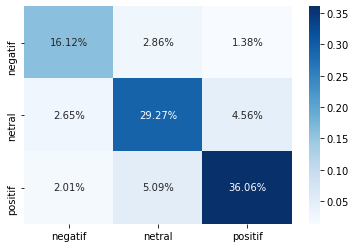

In [95]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

In [96]:
model_2.save("model_CNN.h5")

In [97]:
import pickle
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(nbc, open('NBC.pkl', 'wb'))